In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/IQ-OTH_NCCD lung cancer dataset.txt
/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases/Normal case (246).jpg
/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases/Normal case (155).jpg
/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases/Normal case (311).jpg
/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases/Normal case (45).jpg
/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases/Normal case (298).jpg
/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases/Normal case (359).jpg
/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases/Normal case (230).jpg
/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-O

In [8]:
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import cv2
import os
import seaborn as sns
import umap
from PIL import Image
from scipy import misc
from os import listdir
from os.path import isfile, join
from scipy import misc
from random import shuffle
from collections import Counter
import tensorflow as tf
from tensorflow.keras import models,layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from keras.layers import Input

In [2]:
!pip install split-folders
import numpy as np
import splitfolders
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import Dense, Flatten, Lambda,GlobalAveragePooling2D,Reshape,Conv2D
from tensorflow.keras.models import Model

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [3]:
ds_train=tf.keras.preprocessing.image_dataset_from_directory(r'/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset',subset='training',validation_split=0.2,seed=1)
ds_test=tf.keras.preprocessing.image_dataset_from_directory(r'/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset',subset='validation',validation_split=0.2,seed=1)

Found 1097 files belonging to 3 classes.
Using 878 files for training.
Found 1097 files belonging to 3 classes.
Using 219 files for validation.


In [6]:
class_names=ds_train.class_names
class_names

['Bengin cases', 'Malignant cases', 'Normal cases']

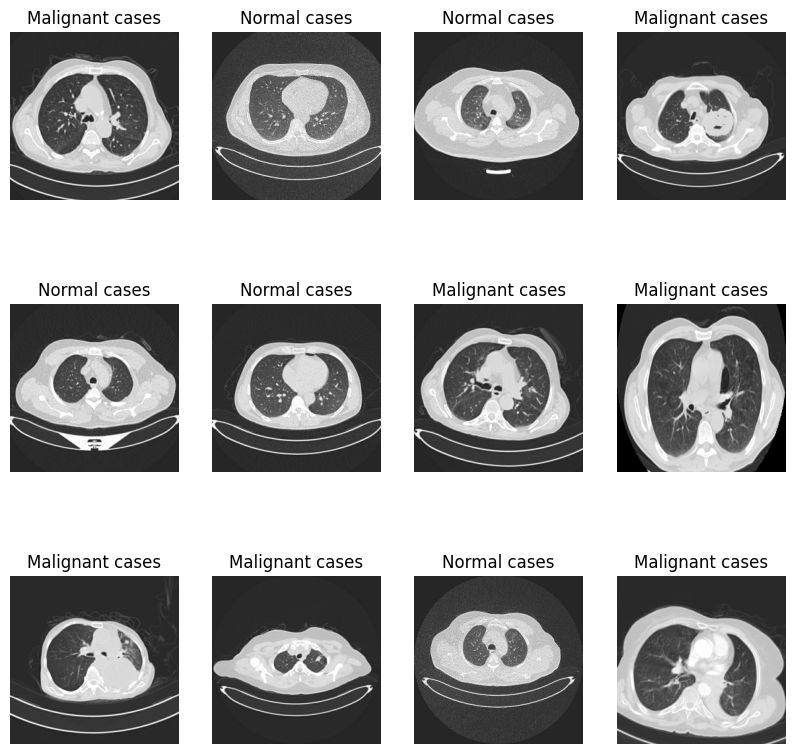

In [7]:
plt.figure(figsize=(10,10))
for image_batch,labels_batch in ds_train.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [3]:
input_folder = '/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset'
splitfolders.ratio(input_folder, output="/kaggle/working/", 
                   seed=42, ratio=(.8, .1, .1), 
                   group_prefix=None) # default values

Copying files: 1097 files [00:06, 163.61 files/s]


In [ ]:
inception_v3

In [ ]:
# Define the input shape of the images
input_shape = (224, 224, 3)

# Define the number of classes
num_classes = 3

# Define the batch size and number of epochs
batch_size = 32
# Define the data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
input_folder = '/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset'
splitfolders.ratio(input_folder, output="/kaggle/working/", 
                   seed=42, ratio=(.8, .1, .1), 
                   group_prefix=None) # default values
train_generator = train_datagen.flow_from_directory('/kaggle/working/train',
                                                    target_size=input_shape[:2],
                                                    color_mode='rgb',
                                                    batch_size=batch_size,
                                                    class_mode='categorical')
valid_datagen = ImageDataGenerator(rescale=1./255)
valid_generator = valid_datagen.flow_from_directory('/kaggle/working/val',
                                                    target_size=input_shape[:2],
                                                    color_mode='rgb',
                                                    batch_size=batch_size,
                                                    class_mode='categorical')
from keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)
for layer in base_model.layers:
    layer.trainable = False
# Add new top layers for our specific classification problem
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dense(train_generator.num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=x)
# Compile the model

model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])
inception_v3_history = model.fit(train_generator,
                    epochs=50,
                    validation_data=valid_generator,
                    verbose=1)

print("Training accuracy:", inception_v3_history.history['accuracy'][-1])
print("Validation accuracy:", inception_v3_history.history['val_accuracy'][-1])

In [ ]:
# Plot training history
import matplotlib.pyplot as plt

def plot_history(history):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_history(inception_v3_history)

In [ ]:
convnext

Found 876 images belonging to 3 classes.
Found 109 images belonging to 3 classes.
111650432/111650432 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/50
 2/28 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.2266 - loss: 7.8404 

W0000 00:00:1724052023.720941     124 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724052023.721294     124 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724052023.721702     124 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724052023.722107     124 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724052023.722465     124 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724052023.722847     124 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724052023.723194     124 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724052023.723546     124 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 7/28 ━━━━━━━━━━━━━━━━━━━━ 20s 980ms/step - accuracy: 0.3811 - loss: 15.3182

W0000 00:00:1724052029.490990     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724052029.491429     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724052029.491936     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step - accuracy: 0.5275 - loss: 10.5294

W0000 00:00:1724052039.789798     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724052039.790156     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724052039.790569     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724052039.790933     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724052039.791258     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724052039.791577     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724052039.791904     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724052039.792226     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


28/28 ━━━━━━━━━━━━━━━━━━━━ 37s 727ms/step - accuracy: 0.5311 - loss: 10.3565 - val_accuracy: 0.3211 - val_loss: 1.5976
Epoch 2/50


W0000 00:00:1724052043.371961     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724052043.372241     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724052043.372777     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724052043.373168     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724052043.373524     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724052043.373892     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724052043.374238     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724052043.374594     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 317ms/step - accuracy: 0.7475 - loss: 0.7934 - val_accuracy: 0.7156 - val_loss: 0.7037
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 312ms/step - accuracy: 0.8343 - loss: 0.4837 - val_accuracy: 0.7798 - val_loss: 0.5638
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 21s 330ms/step - accuracy: 0.7779 - loss: 0.7107 - val_accuracy: 0.7523 - val_loss: 0.5585
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 310ms/step - accuracy: 0.8059 - loss: 0.6771 - val_accuracy: 0.8807 - val_loss: 0.3262
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 309ms/step - accuracy: 0.9113 - loss: 0.2511 - val_accuracy: 0.8073 - val_loss: 0.6005
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 318ms/step - accuracy: 0.8853 - loss: 0.2631 - val_accuracy: 0.8349 - val_loss: 0.3376
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 307ms/step - accuracy: 0.8882 - loss: 0.2782 - val_accuracy: 0.7798 - val_loss: 0.3924
Epoch 9/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 312ms/step - accuracy: 0.8644 - loss: 0.3934 - val_accuracy: 0.899

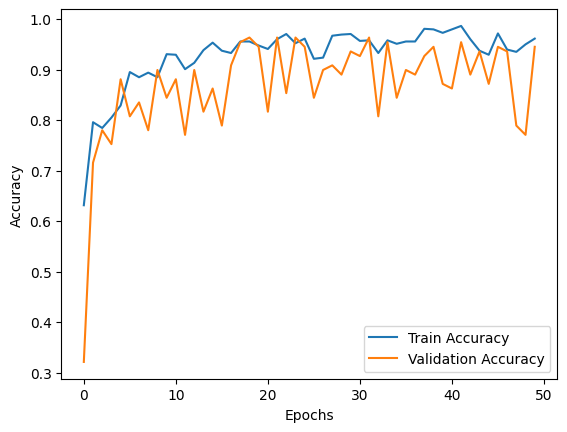

In [5]:
from keras.applications.convnext import ConvNeXtTiny
from keras.layers import Dense, Flatten
from keras.models import Model
# Define the input shape of the images
input_shape = (224, 224, 3)

# Define the number of classes
num_classes = 3

# Define the batch size and number of epochs
batch_size = 32

# Define the data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory('/kaggle/working/train',
                                                    target_size=input_shape[:2],
                                                    color_mode='rgb',
                                                    batch_size=batch_size,
                                                    class_mode='categorical')
valid_datagen = ImageDataGenerator(rescale=1./255)
valid_generator = valid_datagen.flow_from_directory('/kaggle/working/val',
                                                    target_size=input_shape[:2],
                                                    color_mode='rgb',
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

# Load the ConvNeXt model
base_model = ConvNeXtTiny(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add new top layers for our specific classification problem
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dense(num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
convnext_history = model.fit(train_generator,
                             epochs=50,
                             validation_data=valid_generator,
                             verbose=1)

# Print training and validation accuracy
print("Training accuracy:", convnext_history.history['accuracy'][-1])
print("Validation accuracy:", convnext_history.history['val_accuracy'][-1])

# Plot training history
import matplotlib.pyplot as plt

def plot_history(history):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_history(convnext_history)

Found 876 images belonging to 3 classes.
Found 109 images belonging to 3 classes.
Epoch 1/50


W0000 00:00:1724053176.605851     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724053176.606314     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724053176.606774     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724053176.607184     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724053176.607588     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724053176.608004     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724053176.608403     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724053176.608794     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


23/28 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.4197 - loss: 2.5000   

W0000 00:00:1724053208.513107     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724053208.513507     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724053208.514163     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724053208.514996     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724053208.515581     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724053208.516463     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724053208.517106     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724053208.517676     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4316 - loss: 2.4674

W0000 00:00:1724053214.287767     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724053214.288233     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724053214.288567     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724053214.288934     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724053214.289278     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724053214.289634     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724053214.289988     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724053214.290332     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


28/28 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.4337 - loss: 2.4616 - val_accuracy: 0.6606 - val_loss: 1.7252
Epoch 2/50


W0000 00:00:1724053217.112412     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724053217.112958     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724053217.113378     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724053217.113761     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724053217.114138     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724053217.114511     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724053217.114910     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724053217.115276     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 360ms/step - accuracy: 0.6507 - loss: 1.8456 - val_accuracy: 0.7615 - val_loss: 1.5473
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 375ms/step - accuracy: 0.7049 - loss: 1.7002 - val_accuracy: 0.7431 - val_loss: 1.5904
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 361ms/step - accuracy: 0.7652 - loss: 1.5357 - val_accuracy: 0.8257 - val_loss: 1.3592
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 361ms/step - accuracy: 0.8246 - loss: 1.3910 - val_accuracy: 0.8807 - val_loss: 1.2885
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 356ms/step - accuracy: 0.8352 - loss: 1.3174 - val_accuracy: 0.7890 - val_loss: 1.4294
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 367ms/step - accuracy: 0.8718 - loss: 1.2835 - val_accuracy: 0.8440 - val_loss: 1.2703
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 359ms/step - accuracy: 0.8944 - loss: 1.1835 - val_accuracy: 0.8532 - val_loss: 1.2922
Epoch 9/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 359ms/step - accuracy: 0.9032 - loss: 1.2274 - val_accuracy: 0.935

W0000 00:00:1724053873.027781     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724053873.028215     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724053873.028739     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Test accuracy (using training data as proxy): 0.9977169036865234


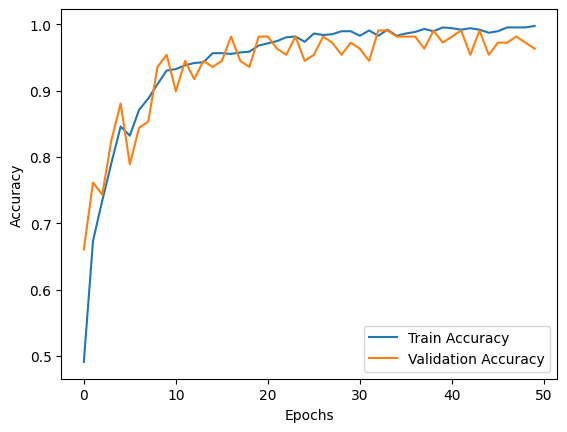

In [10]:
from keras.applications.convnext import ConvNeXtTiny
from keras.layers import Dense, Flatten, Dropout
from keras.models import Model
from keras.optimizers import Adam
from keras.regularizers import l2

# Define the input shape of the images
input_shape = (224, 224, 3)

# Define the number of classes
num_classes = 3

# Define the batch size and number of epochs
batch_size = 32
epochs = 50

# Define the data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory('/kaggle/working/train',
                                                    target_size=input_shape[:2],
                                                    color_mode='rgb',
                                                    batch_size=batch_size,
                                                    class_mode='categorical')
valid_datagen = ImageDataGenerator(rescale=1./255)
valid_generator = valid_datagen.flow_from_directory('/kaggle/working/val',
                                                    target_size=input_shape[:2],
                                                    color_mode='rgb',
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

# Load the ConvNeXt model
base_model = ConvNeXtTiny(weights='imagenet', include_top=False, input_shape=input_shape)

# Unfreeze the last few layers of the base model for fine-tuning
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Add new top layers for our specific classification problem
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.5)(x)  # Add dropout to prevent overfitting
x = Dense(num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model with a reduced learning rate
model.compile(
    optimizer=Adam(learning_rate=1e-5),  # Reduced learning rate for fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
convnext_history = model.fit(train_generator,
                             epochs=epochs,
                             validation_data=valid_generator,
                             verbose=1)

# Print training accuracy
train_accuracy = convnext_history.history['accuracy'][-1]
print("Training accuracy:", train_accuracy)

# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(valid_generator)
print("Validation accuracy:", val_accuracy)

# Evaluate the model on the training data to get testing accuracy as a proxy
train_loss, test_accuracy = model.evaluate(train_generator)
print("Test accuracy (using training data as proxy):", test_accuracy)

# Plot training history
import matplotlib.pyplot as plt

def plot_history(history):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_history(convnext_history)

In [ ]:
from keras.applications.convnext import ConvNeXtTiny
from keras.layers import Dense, Flatten, Dropout
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2

# Define the input shape of the images
input_shape = (224, 224, 3)

# Define the number of classes
num_classes = 3

# Define the batch size and number of epochs
batch_size = 32
epochs = 50

# Define the data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory('/kaggle/working/train',
                                                    target_size=input_shape[:2],
                                                    color_mode='rgb',
                                                    batch_size=batch_size,
                                                    class_mode='categorical')
valid_datagen = ImageDataGenerator(rescale=1./255)
valid_generator = valid_datagen.flow_from_directory('/kaggle/working/val',
                                                    target_size=input_shape[:2],
                                                    color_mode='rgb',
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

# Load the ConvNeXt model
base_model = ConvNeXtTiny(weights='imagenet', include_top=False, input_shape=input_shape)

# Unfreeze the last few layers of the base model for fine-tuning
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Add new top layers for our specific classification problem
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.5)(x)  # Add dropout to prevent overfitting
x = Dense(num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model with a reduced learning rate
model.compile(
    optimizer=Adam(learning_rate=1e-5),  # Reduced learning rate for fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
convnext_history = model.fit(train_generator,
                             epochs=epochs,
                             validation_data=valid_generator,
                             verbose=1)

# Print training accuracy
train_accuracy = convnext_history.history['accuracy'][-1]
print("Training accuracy:", train_accuracy)

# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(valid_generator)
print("Validation accuracy:", val_accuracy)

# Evaluate the model on the training data to get testing accuracy as a proxy
train_loss, test_accuracy = model.evaluate(train_generator)
print("Test accuracy (using training data as proxy):", test_accuracy)

# Plot training history
import matplotlib.pyplot as plt

def plot_history(history):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_history(convnext_history)

In [38]:
!pip install keras-cv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 4.3 MB/s eta 0:00:0000:0100:01m


In [ ]:
ResNet50

Found 876 images belonging to 3 classes.
Found 109 images belonging to 3 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 2/28 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.1719 - loss: 9.1202 

I0000 00:00:1723549082.878771     116 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


28/28 ━━━━━━━━━━━━━━━━━━━━ 37s 748ms/step - accuracy: 0.4251 - loss: 21.8798 - val_accuracy: 0.5688 - val_loss: 4.3685
Epoch 2/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 305ms/step - accuracy: 0.5936 - loss: 2.7189 - val_accuracy: 0.5505 - val_loss: 1.2847
Epoch 3/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 312ms/step - accuracy: 0.7230 - loss: 1.0400 - val_accuracy: 0.4771 - val_loss: 2.5067
Epoch 4/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 307ms/step - accuracy: 0.5584 - loss: 1.5322 - val_accuracy: 0.7064 - val_loss: 0.6833
Epoch 5/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 310ms/step - accuracy: 0.7179 - loss: 0.9007 - val_accuracy: 0.7982 - val_loss: 0.4723
Epoch 6/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 318ms/step - accuracy: 0.7441 - loss: 0.7126 - val_accuracy: 0.8532 - val_loss: 0.4239
Epoch 7/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 302ms/step - accuracy: 0.7315 - loss: 0.7607 - val_accuracy: 0.6055 - val_loss: 1.2431
Epoch 8/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 307ms/step - accuracy: 0.7688 - loss: 0.6510 - val_accuracy: 0.77

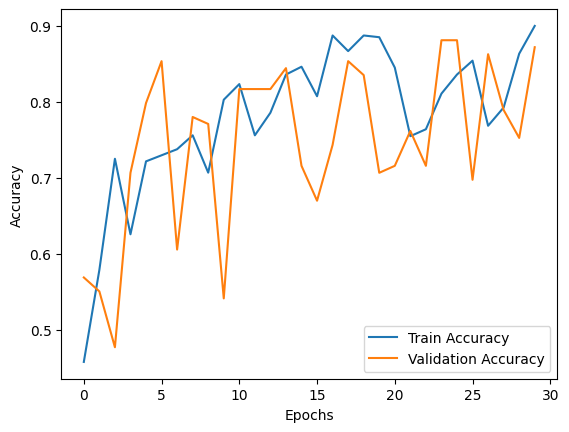

In [9]:
from keras.applications import ResNet50
from keras.layers import Dense, Flatten
from keras.models import Model
import matplotlib.pyplot as plt

# Define the input shape of the images
input_shape = (224, 224, 3)

# Define the number of classes
num_classes = 3

# Define the batch size and number of epochs
batch_size = 32

# Define the data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory('/kaggle/working/train',
                                                    target_size=input_shape[:2],
                                                    color_mode='rgb',
                                                    batch_size=batch_size,
                                                    class_mode='categorical')
valid_datagen = ImageDataGenerator(rescale=1./255)
valid_generator = valid_datagen.flow_from_directory('/kaggle/working/val',
                                                    target_size=input_shape[:2],
                                                    color_mode='rgb',
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

# Load the ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add new top layers for our specific classification problem
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dense(num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
resnet_history = model.fit(train_generator,
                           epochs=30,
                           validation_data=valid_generator,
                           verbose=1)

# Print training and validation accuracy
print("Training accuracy:", resnet_history.history['accuracy'][-1])
print("Validation accuracy:", resnet_history.history['val_accuracy'][-1])

# Plot training history
def plot_history(history):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_history(resnet_history)

In [ ]:
cnn

Model: "sequential_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)              │ (None, 254, 254, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 127, 127, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 125, 125, 64)   │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 60, 60, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_162 (Dense)               │ (None, 64)             │     1,843,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_163 (Dense)               │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,939,299 (7.40 MB)

 Trainable params: 1,939,299 (7.40 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 174ms/step - accuracy: 0.4779 - loss: 1.3173 - val_accuracy: 0.6682 - val_loss: 0.7339
Epoch 2/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.6865 - loss: 0.7530 - val_accuracy: 0.7409 - val_loss: 0.6318
Epoch 3/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.7398 - loss: 0.6549 - val_accuracy: 0.7545 - val_loss: 0.5968
Epoch 4/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.7802 - loss: 0.5842 - val_accuracy: 0.7727 - val_loss: 0.5567
Epoch 5/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.7991 - loss: 0.4863 - val_accuracy: 0.8364 - val_loss: 0.4271
Epoch 6/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.8502 - loss: 0.3993 - val_accuracy: 0.7318 - val_loss: 0.6030
Epoch 7/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.8078 - loss: 0.4238 - val_accuracy: 0.8955 - val_loss: 0.3313
Epoch 8/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.9219 - loss: 0.2550 - val_accuracy: 0.9227 - 

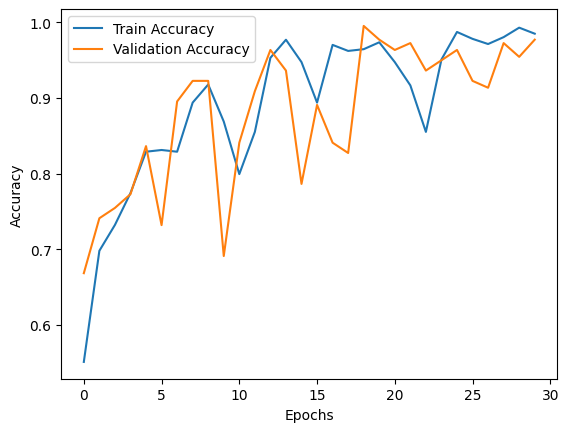

In [27]:
import numpy as np
import os
import random
import cv2
import time
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# Define the input image dimensions
img_width, img_height = 256, 256
input_shape = (img_width, img_height, 3)
num_classes = 3

# Path to the dataset
dir = '/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset'
categories = ['Bengin cases', 'Malignant cases', 'Normal cases']

# Load and preprocess images
img_data = []
for cata in categories:
    folder = os.path.join(dir, cata)
    label = categories.index(cata)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        try:
            img_array = cv2.imread(img_path)
            img_array = cv2.resize(img_array, (img_height, img_width))
            if img_array is not None and not img_array.size == 0:
                img_data.append([img_array, label])
        except Exception as e:
            continue

# Shuffle the data
random.shuffle(img_data)

# Extract images and labels
x = []
y = []
for features, labels in img_data:
    x.append(features)
    y.append(labels)

# Convert to arrays and normalize images
X = np.array(x, dtype=float) / 255.0
Y = np.array(y, dtype=int)  # Use int for sparse_categorical_crossentropy

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Build the CNN model
model = Sequential([
    Conv2D(128, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
start_time = time.time()
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test), 
                    epochs=30, 
                    batch_size=32)  # Added batch_size for better training control

final_time = time.time() - start_time
print("Total time for training:", final_time)

# Plot training history
def plot_history(history):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_history(history)

In [ ]:
MobileNetV2

Error printing model summary: Undefined shapes are not supported.
Epoch 1/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 27s 555ms/step - accuracy: 0.6998 - loss: 0.7774 - val_accuracy: 0.8591 - val_loss: 0.3893
Epoch 2/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8766 - loss: 0.3333 - val_accuracy: 0.8545 - val_loss: 0.3217
Epoch 3/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8726 - loss: 0.2965 - val_accuracy: 0.8500 - val_loss: 0.3357
Epoch 4/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9041 - loss: 0.2410 - val_accuracy: 0.8773 - val_loss: 0.2658
Epoch 5/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8915 - loss: 0.2366 - val_accuracy: 0.8591 - val_loss: 0.3040
Epoch 6/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8995 - loss: 0.2337 - val_accuracy: 0.9000 - val_loss: 0.2125
Epoch 7/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9193 - loss: 0.2127 - val_accuracy: 0.8591 - val_loss: 0.2757
Epoch 8/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 37

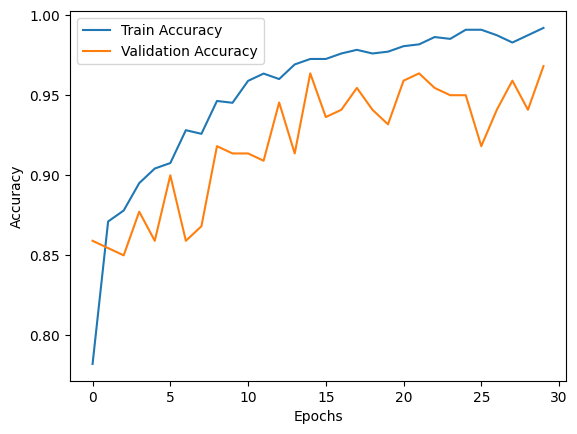

In [32]:
import numpy as np
import os
import random
import cv2
import time
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
import matplotlib.pyplot as plt

# Define the input image dimensions
img_width, img_height = 256, 256
input_shape = (img_width, img_height, 3)
num_classes = 3

# Path to the dataset
dir = '/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset'
categories = ['Bengin cases', 'Malignant cases', 'Normal cases']

# Load and preprocess images
img_data = []
for cata in categories:
    folder = os.path.join(dir, cata)
    label = categories.index(cata)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        try:
            img_array = cv2.imread(img_path)
            img_array = cv2.resize(img_array, (img_height, img_width))
            if img_array is not None and not img_array.size == 0:
                img_data.append([img_array, label])
        except Exception as e:
            continue

# Shuffle the data
random.shuffle(img_data)

# Extract images and labels
x = []
y = []
for features, labels in img_data:
    x.append(features)
    y.append(labels)

# Convert to arrays and normalize images
X = np.array(x, dtype=float) / 255.0
Y = np.array(y, dtype=int)  # Use int for sparse_categorical_crossentropy

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Load MobileNetV2 pre-trained model without the top layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the base model
base_model.trainable = False

# Build the custom top layer model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Add global average pooling
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

# Print the model summary
try:
    model.summary()
except Exception as e:
    print(f"Error printing model summary: {e}")

# Train the model
start_time = time.time()
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test), 
                    epochs=30, 
                    batch_size=32)  # Added batch_size for better training control

final_time = time.time() - start_time
print("Total time for training:", final_time)

# Plot training history
def plot_history(history):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_history(history)

In [ ]:
from keras.applications.inception_v3 import InceptionV3
from keras.layers import Dense, Flatten, Dropout
from keras.models import Model
from keras.optimizers import Adam
from keras.regularizers import l2

# Define the input shape of the images
input_shape = (224, 224, 3)

# Define the number of classes
num_classes = 3

# Define the batch size and number of epochs
batch_size = 32
epochs = 50

# Define the data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory('/kaggle/working/train',
                                                    target_size=input_shape[:2],
                                                    color_mode='rgb',
                                                    batch_size=batch_size,
                                                    class_mode='categorical')
valid_datagen = ImageDataGenerator(rescale=1./255)
valid_generator = valid_datagen.flow_from_directory('/kaggle/working/val',
                                                    target_size=input_shape[:2],
                                                    color_mode='rgb',
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

# Load the InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)

# Unfreeze the last few layers of the base model for fine-tuning
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Add new top layers for our specific classification problem
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.5)(x)  # Add dropout to prevent overfitting
x = Dense(num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model with a reduced learning rate
model.compile(
    optimizer=Adam(learning_rate=1e-5),  # Reduced learning rate for fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
inception_history = model.fit(train_generator,
                             epochs=epochs,
                             validation_data=valid_generator,
                             verbose=1)

# Print training accuracy
train_accuracy = inception_history.history['accuracy'][-1]
print("Training accuracy:", train_accuracy)

# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(valid_generator)
print("Validation accuracy:", val_accuracy)

# Evaluate the model on the training data to get testing accuracy as a proxy
train_loss, test_accuracy = model.evaluate(train_generator)
print("Test accuracy (using training data as proxy):", test_accuracy)

# Plot training history
import matplotlib.pyplot as plt

def plot_history(history):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_history(inception_history)

Found 876 images belonging to 3 classes.
Found 109 images belonging to 3 classes.
Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 154s 2s/step - accuracy: 0.5980 - loss: 2.0111 - val_accuracy: 0.7156 - val_loss: 1.9622
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 347ms/step - accuracy: 0.7930 - loss: 1.5251 - val_accuracy: 0.7339 - val_loss: 1.6012
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 339ms/step - accuracy: 0.8381 - loss: 1.4606 - val_accuracy: 0.7431 - val_loss: 1.6515
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 338ms/step - accuracy: 0.8543 - loss: 1.4133 - val_accuracy: 0.7064 - val_loss: 1.6658
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 335ms/step - accuracy: 0.8841 - loss: 1.3219 - val_accuracy: 0.6606 - val_loss: 1.7713
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 329ms/step - accuracy: 0.8622 - loss: 1.3307 - val_accuracy: 0.7064 - val_loss: 1.6308
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 346ms/step - accuracy: 0.8838 - loss: 1.2593 - val_accuracy: 0.6697 - val_loss: 1.7167
Epoch 8/50
28/28 